### Logistic Regression

In [9]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)  # Unlimited columns.
pd.options.mode.use_inf_as_na = True        # Any inf or -inf is 
                                            # treated as NA.

In [10]:
#read the file with organized data
diabetes_use = pd.read_csv('dataset/diabetes_EDA.csv')

In [11]:
diabetes_condition = pd.DataFrame(diabetes_use['Diabetes_binary'])
diabetes_variables = pd.DataFrame(diabetes_use[["HighBP", "HighChol", "Sex", "PhysActivity", "DiffWalk", "BMI", "GenHlth", "PhysHlth", "Age", "Income"]]) 
x_train, x_test, y_train, y_test = train_test_split(diabetes_variables, diabetes_condition, test_size = 0.25)

In [12]:
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)

C:\Users\paier\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\paier\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The classification accuracy of Train Set 	: 0.8718447450663287
The classification accuracy of Test Set 	: 0.8693656777577446

For train set
The True Positive Rate of trian set for this model 	: 0.123463028465555
The False Positive Rate of train set for this model 	: 0.016574585635359115
The True Negative Rate of train set of this model 	: 0.9834254143646409
The False Negative Rate of train set of this model 	: 0.876536971534445

For test set
The True Positive Rate of test set for this model 	: 0.123463028465555
The False Positive Rate of test set for this model 	: 0.016574585635359115
The True Negative Rate of test set of this model 	: 0.9834254143646409
The False Negative Rate of test set of this model 	: 0.876536971534445


<AxesSubplot:>

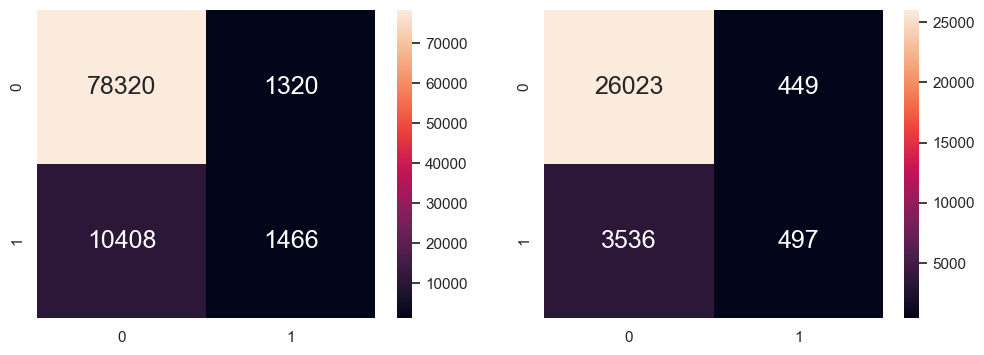

In [17]:
y_train_pred = l_regression.predict(x_train)
y_test_pred = l_regression.predict(x_test)

#Print the classification accuracy
print("The classification accuracy of Train Set \t:", l_regression.score(x_train, y_train))
print("The classification accuracy of Test Set \t:", l_regression.score(x_test, y_test))

print()

#Print the TPR and FPR for train set
lr_tr = confusion_matrix(y_train, y_train_pred)
FP_tr_3 = lr_tr[0][1]
FN_tr_3 = lr_tr[1][0]
TP_tr_3 = lr_tr[1][1]
TN_tr_3 = lr_tr[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_3/(FN_tr_3 + TP_tr_3))
print("The False Negative Rate of train set of this model \t:", FN_tr_3/(TP_tr_3 + FN_tr_3))
print("The False Positive Rate of train set for this model \t:", FP_tr_3/(FP_tr_3 + TN_tr_3))
print("The True Negative Rate of train set of this model \t:", TN_tr_3/(TN_tr_3 + FP_tr_3))


print()

#Print the TPR and FPR for test set
lr_tt = confusion_matrix(y_test, y_test_pred)
FP_tt_3 = lr_tt[0][1]
FN_tt_3 = lr_tt[1][0]
TP_tt_3 = lr_tt[1][1]
TN_tt_3 = lr_tt[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_3/(FN_tt_3 + TP_tt_3))
print("The False Positive Rate of test set for this model \t:", FP_tt_3/(FP_tt_3 + TN_tt_3))
print("The True Negative Rate of test set of this model \t:", TN_tt_3/(TN_tt_3 + FP_tt_3))
print("The False Negative Rate of test set of this model \t:", FN_tt_3/(TP_tt_3 + FN_tt_3))

#Print the two-way confusion map for train(left) and test(right)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [16]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train, y_train)

C:\Users\paier\AppData\Local\Temp\ipykernel_11904\2229068905.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_forest.fit(x_train, y_train)


RandomForestClassifier()

Classification Accuracy 	: 0.9694472976812291


<Axes: >

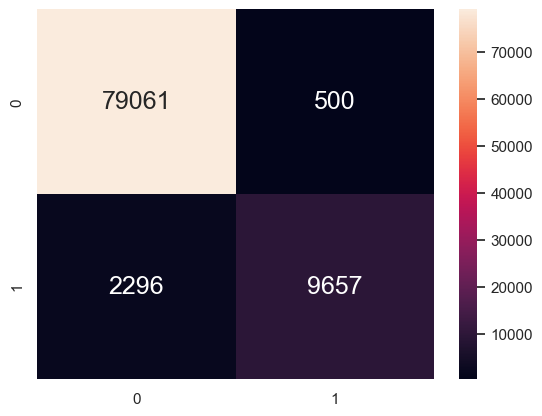

In [15]:
from sklearn.metrics import confusion_matrix
# Predict Legendary corresponding to Total Train
y_train_pred = r_forest.predict(x_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", r_forest.score(x_train, y_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})